In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel("GSAF5.xls")
dfcopy = df.copy()
dfcopy.columns = dfcopy.columns.str.lower().str.replace(" ", "_")

In [2]:
import warnings
warnings.filterwarnings("ignore")

### ELIMINO COLUMNAS 21 Y 22 XQ ESTAN LLENAS DE NAN

In [3]:
dfcopy.drop("unnamed:_21", axis=1, inplace=True)
dfcopy.drop("unnamed:_22", axis=1, inplace=True)
dfcopy.drop("href_formula", axis=1, inplace=True)
dfcopy.drop("href", axis=1, inplace=True)
dfcopy.drop("case_number", axis=1, inplace=True)
dfcopy.drop("case_number.1", axis=1, inplace=True)
dfcopy.drop("pdf", axis=1, inplace=True)


### CAMBIO "NAN" POR "0" Y EL TYPE DE "FLOAT" A "INT" EN YEAR

In [4]:
dfcopy["year"].fillna(0, inplace=True)

In [5]:
dfcopy['year'] = dfcopy['year'].astype(int)

### CAMBIO ?, NAN POR INVALID Y PASO A MINUSCULAS Y _ EN TYPE

In [6]:
dfcopy["type"] = dfcopy["type"].str.replace("?", "Invalid")

In [7]:
dfcopy["type"].fillna("invalid", inplace=True)

In [8]:
dfcopy['type'] = dfcopy['type'].str.lower().str.replace(" ", "_")

In [9]:
dfcopy["year"].fillna("invalid", inplace=True)

### 

In [10]:
dfcopy['country'].fillna("no_country", inplace=True)

In [11]:
dfcopy['country'] = dfcopy['country'].str.lower().str.replace(" ", "_")

### CAMBIO LOS NAN A NO_STATE CAMBIO A MINUSCULAS Y _ Y QUITO _ QUE APARECEN AL PRINCIPIO

In [12]:
dfcopy['state'].fillna("no_state", inplace=True)

In [13]:
dfcopy['state'] = dfcopy['state'].str.lower().str.replace(" ", "_")

In [14]:
dfcopy['state'] = dfcopy['state'].str.lstrip('_')

### SIGO LIMPIANDO COLUMNAS

In [15]:
dfcopy['location'].fillna("no_location", inplace=True)

In [16]:
dfcopy['location'] = dfcopy['location'].str.lower().str.replace(" ", "_")

### LIMPIO LA COLUMNA AGE

In [17]:
dfcopy['age'].fillna(0, inplace=True)

In [18]:
dfcopy['age'] = dfcopy['age'].str.replace("30s", "35").str.replace("20/30", "25").str.replace("20s", "25").str.replace("!2", "2").str.replace("50s", "55").str.replace("40s", "45").str.replace("teen", "15").str.replace("Teen", "15").str.replace("M", "0").str.replace("!6", "6").str.replace("!!", "0").str.replace("45 and 15", "30").str.replace("28 & 22", "25").str.replace("60s", "65").str.replace("20's", "25").str.replace("9 & 60", "35").str.replace("a minor", "9").str.replace("18 months", "1").str.replace("28 & 26", "27").str.replace("18 or 20", "19").str.replace("12 or 13", "12").str.replace("46 & 34", "40").str.replace("23 & 30", "26").str.replace("36 & 26", "31").str.replace("8 or 10", "9").str.replace("\xa0 ", "0").str.replace("30 or 36", "33").str.replace("6½", "6").str.replace("21 & ?", "21").str.replace("33 or 37", "35").str.replace("mid-30s", "35").str.replace("23 & 20", "21").str.replace("7      &    31", "19").str.replace("20?", "20").str.replace("60's", "65").str.replace("32 & 30", "31").str.replace("16 to 18", "17").str.replace("Elderly", "0").str.replace("mid-20s", "25").str.replace("Ca. 33", "33").str.replace("21 or 26", "23").str.replace(">50", "55").str.replace("18 to 22", "20").str.replace("adult", "0").str.replace("33 & 37", "35").str.replace("25 or 28", "26").str.replace("? & 27", "27").str.replace("24 & 35", "29").str.replace("30 & 32", "31").str.replace("50 & 30", "40").str.replace("17 & 35", "26").str.replace("X", "0").str.replace("middle-age", "40").str.replace("13 or 18", "15").str.replace("34 & 19", "27").str.replace("33 & 26", "29").str.replace("2 to 3 months", "0").str.replace("MAKE LINE GREEN", "0").str.replace("young", "17").str.replace("7 or 8", "7").str.replace("17 & 16", "16").str.replace("F", "0").str.replace("Both 11", "11").str.replace("9 or 10", "9").str.replace("36 & 23", "29").str.replace("A.M.", "0").str.replace("?    &   14", "14").str.replace("10 or 12", "11").str.replace("31 or 33", "32").str.replace("2½", "2").str.replace("13 or 14", "13")

In [19]:
dfcopy['age'].fillna(0, inplace=True)

In [20]:
dfcopy['age'] = dfcopy['age'].astype(str)

In [21]:
valores_no_numericos = dfcopy['age'][~dfcopy['age'].str.isnumeric()]

In [22]:
dfcopy['age'] = dfcopy['age'].str.replace("15s", "15").str.replace("22, 57, 31", "36").str.replace("28, 26", "27").str.replace("mid-35", "35").str.replace("30", "30").str.replace("28", "28").str.replace("mid-25", "25").str.replace("74 ", "74").str.replace("45 ", "45").str.replace("20 ", "20").str.replace("9 & 12", "10").str.replace("? & 19", "19").str.replace("9 months", "1").str.replace("25 to 35", "30").str.replace("(0)", "0").str.replace("37, 67, 35, 27,  27", "38").str.replace("21, 34,29", "28").str.replace("40", "40").str.replace("0AKE LINE GREEN", "0").str.replace("43", "43").str.replace("17", "17").str.replace("A.0.", "0")

In [23]:
dfcopy['age'] = dfcopy['age'].str.replace('""', "")

In [24]:
dfcopy['age'] = dfcopy['age'].str.replace("23 & 26", "24").str.replace('"17"', "17").str.replace('"40"', "40")

In [25]:
dfcopy['age'] = dfcopy['age'].str.replace("  ", "0").str.replace(" 43", "43").str.replace(" 28", "28").str.replace(" 30", "30")

In [26]:
dfcopy['age'] = dfcopy['age'].str.replace(" ", "0")

In [27]:
dfcopy['age'] = dfcopy['age'].astype(int)

In [28]:
dfcopy["name"].value_counts()

name
male               677
female             135
boy                 23
2 males             17
boat                14
                  ... 
Richard Horton       1
C.K.                 1
John McGovern        1
Martin Gunda         1
Jules Patterson      1
Name: count, Length: 5678, dtype: int64

In [29]:
dfcopy["activity"].fillna("undefined", inplace=True)

In [30]:
from dateutil import parser
def convert_to_datetime(value):
    try:
        return parser.parse(str(value)).strftime('%H:%M')
    except:
        return pd.NaT

dfcopy['time'] = dfcopy['time'].apply(convert_to_datetime)


In [31]:
import datetime
trash_words = ['Reported','Reprted','reported','before','Before','Late']
dfcopy['date'] = dfcopy['date'].astype(str)
dfcopy = dfcopy[~dfcopy['date'].map(lambda x: x in trash_words)]
dfcopy['date'] = pd.to_datetime(dfcopy['date'], errors='coerce')

tengo un dataframe dfcopy y quiero rellenar los valores Nan que hay en la columna time con los valores que hay en la columna year dame el codigo

In [32]:
dfcopy.drop_duplicates(keep="first", inplace= True)

In [33]:
def convert_to_datetime(value):
    try:
        return parser.parse(str(value)).strftime('%H:%M')
    except:
        return pd.NaT
dfcopy['time'] = dfcopy['time'].apply(convert_to_datetime)
dfcopy['time'] = pd.to_datetime(dfcopy['time'], format='%H:%M', errors='coerce')

In [34]:
dfcopy["name"].unique()

array(['Michael Smith', 'male', 'Murray Adams', ..., 'A "chiefess"',
       'Ahmun', 'Jules Patterson'], dtype=object)

In [35]:
dfcopy['name'].fillna("undefined", inplace=True)

In [36]:
dfcopy.rename(columns={'unnamed:_11': 'survived'}, inplace=True)

In [37]:
dfcopy['survived'].fillna("undefined", inplace=True)

In [38]:
dfcopy['survived'].unique()

array(['N', 'Y', 'M', 'undefined', 'F', 'n', 'Nq', 'UNKNOWN', 2017,
       'Y x 2', ' N', 'N ', 'y'], dtype=object)

In [39]:
map_function = lambda x: "yes" if str(x).strip().lower() == 'y' else ("no" if str(x).strip().lower() == 'n' else "undefined")
dfcopy["survived"] = dfcopy["survived"].map(map_function)

In [40]:
dfcopy.rename(columns={'species_': 'species'}, inplace=True)

In [41]:
dfcopy["sex"].unique()

array(['M', 'F', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'], dtype=object)

In [42]:
dfcopy["species"].fillna("undefined", inplace=True)

In [43]:
dfcopy["source"].fillna("undefined", inplace=True)

In [44]:
dfcopy["injury"].fillna("undefined", inplace=True)

In [45]:
map_function = lambda x: "male" if str(x).strip().lower() == 'm' else ("female" if str(x).strip().lower() == 'f' else "undefined")
dfcopy["sex"] = dfcopy["sex"].map(map_function)

In [46]:
dfcopy["original_order"].fillna(0, inplace=True)

In [47]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6935 entries, 0 to 6934
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            6054 non-null   datetime64[ns]
 1   year            6935 non-null   int32         
 2   type            6935 non-null   object        
 3   country         6935 non-null   object        
 4   state           6935 non-null   object        
 5   location        6935 non-null   object        
 6   activity        6935 non-null   object        
 7   name            6935 non-null   object        
 8   sex             6935 non-null   object        
 9   age             6935 non-null   int32         
 10  injury          6935 non-null   object        
 11  survived        6935 non-null   object        
 12  time            2722 non-null   datetime64[ns]
 13  species         6935 non-null   object        
 14  source          6935 non-null   object        
 15  original_

### hasta aqui he limpiado los datos


In [48]:
dfa = dfcopy[dfcopy['age'] != 0].groupby("country")["age"].mean().sort_values()

In [49]:
dfa.reset_index()
dfa

country
grenada                   14.250000
iraq                      14.666667
cyprus                    15.000000
ceylon_(sri_lanka)        15.000000
north_atlantic_ocean_     15.000000
                            ...    
azores                    49.000000
france                    50.000000
british_virgin_islands    53.000000
st._maartin               55.000000
grand_cayman              57.000000
Name: age, Length: 110, dtype: float64

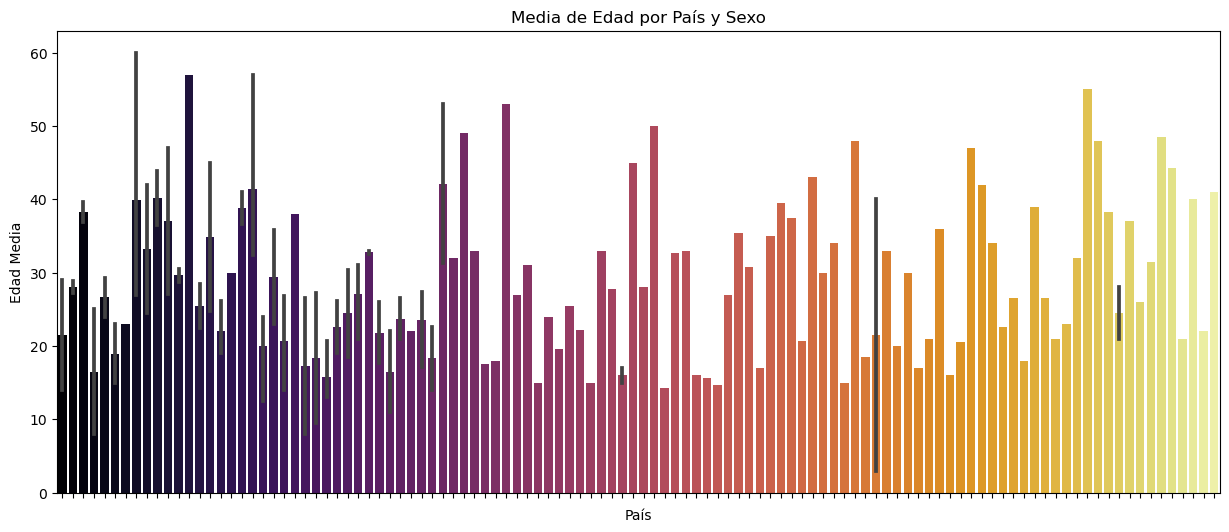

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_pivot2 = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'max', 'min'))
df_pivot2_reset = df_pivot2.reset_index()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='country', y='mean', data=df_pivot2_reset, palette='inferno')
ax.set_xticklabels([])
plt.title('Media de Edad por País y Sexo')
plt.xlabel('País')
plt.ylabel('Edad Media')
plt.show()


In [55]:
df_pivot2 = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'max', 'min'))
df_pivot2

max       mean  min
sex       country                              
female    atlantic_ocean     27  14.000000    1
          australia          64  27.186047    2
          bahamas            73  39.700000   20
          belize              8   8.000000    8
          bermuda            29  24.000000   19
...                         ...        ...  ...
undefined pacific_ocean       3   3.000000    3
          papua_new_guinea   14  13.500000   13
          south_africa       31  31.000000   31
          thailand           28  28.000000   28
          usa                36  17.125000    9

[154 rows x 3 columns]

In [52]:
df_pivot = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'count', 'max', 'min'))
df_pivot_filtered = df_pivot[df_pivot['count'] > 25]
df_pivot_filtered

count  max       mean  min
sex    country                                 
female australia        43   64  27.186047    2
       usa             176   77  26.221591    2
male   australia       347   78  28.809798    5
       bahamas          35   77  36.971429   10
       brazil           38   43  22.947368   12
       mexico           30   66  32.366667   10
       reunion          26   52  30.384615   13
       south_africa    101   74  29.128713   13
       usa             721   87  27.421637    3

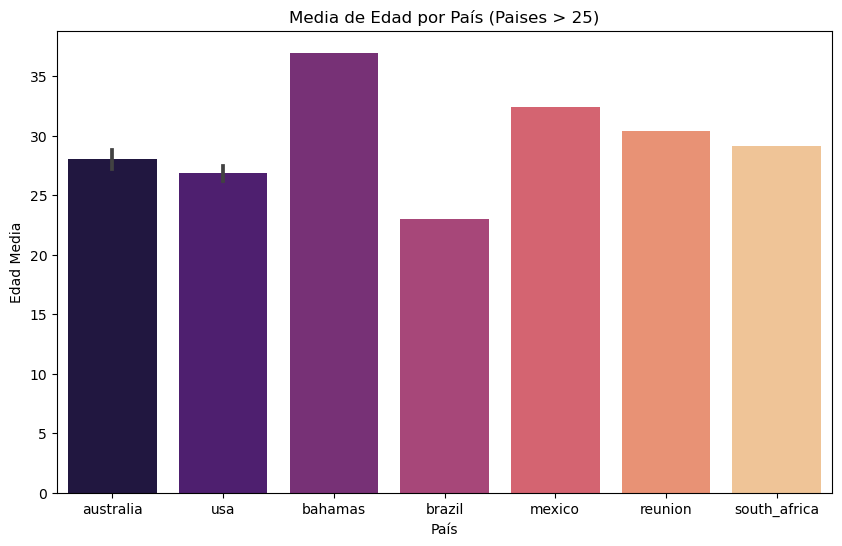

In [77]:
df_pivot = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'count', 'max', 'min'))
df_pivot_filtered = df_pivot[df_pivot['count'] > 25]
df_pivot_filtered_reset = df_pivot_filtered.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='country', y='mean', data=df_pivot_filtered_reset, palette='magma')
plt.title('Media de Edad por País (Paises > 25)')
plt.xlabel('País')
plt.ylabel('Edad Media')
plt.show()


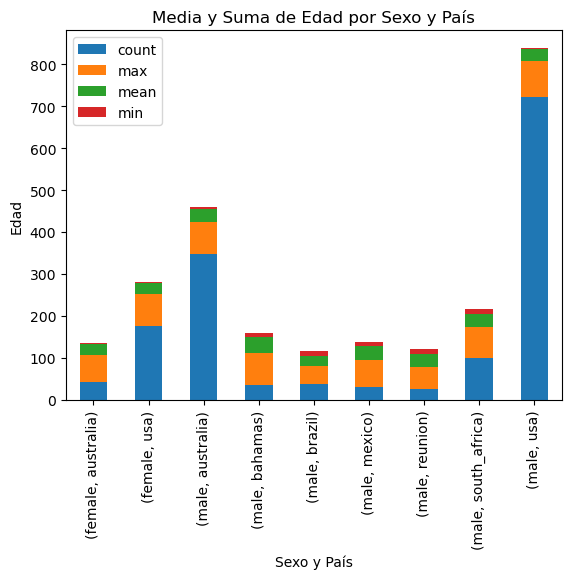

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


# Crear un gráfico de barras apiladas para la media y suma de 'age' por sexo y país
df_pivot_filtered.plot(kind='bar', stacked=True, title='Media y Suma de Edad por Sexo y País')
plt.ylabel('Edad')
plt.xlabel('Sexo y País')
plt.show()
